## Climate Change Exercises

***

## Project Description

The planet's surface temperature is increasing as greenhouse gas emissions increase, and this global warming and carbon cycle disruption is wreaking havoc on natural systems. Living systems that depend on current temperature, weather, currents and carbon balance are jeopardized, and human society will be forced to contend with widespread economic, social, political and environmental damage as the temperature continues to rise. In these exercises, we examine the relationship between global temperature changes, greenhouse gases and human carbon emissions using time series of actual atmospheric and ice core measurements from the National Oceanic and Atmospheric Administration (NOAA) and Carbon Dioxide Information Analysis Center (CDIAC).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


How many times larger were carbon emissions in the last year relative to the first year?

In [2]:
df1 = pd.read_csv("tempcarbon.csv")

In [3]:
df1.head()

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
0,1880,-0.11,-0.48,-0.01,236.00
1,1881,-0.08,-0.40,0.01,243.00
2,1882,-0.10,-0.48,0.00,256.00
3,1883,-0.18,-0.66,-0.04,272.00
4,1884,-0.26,-0.69,-0.14,275.00


In [4]:
df1.tail()

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
263,1875,nan,nan,nan,188.00
264,1876,nan,nan,nan,191.00
265,1877,nan,nan,nan,194.00
266,1878,nan,nan,nan,196.00
267,1879,nan,nan,nan,210.00


In [5]:
df1.iloc[267] - df1.iloc[0]

year                -1.00
temp_anomaly          nan
land_anomaly          nan
ocean_anomaly         nan
carbon_emissions   -26.00
dtype: float64

How many degrees Celsius has temperature increased over the date range? Compare the temperatures in the most recent year versus the oldest year.

Make a time series line plot of carbon emissions (carbon_emissions) from the temp_carbon dataset. The y-axis is metric tons of carbon
emitted per year.

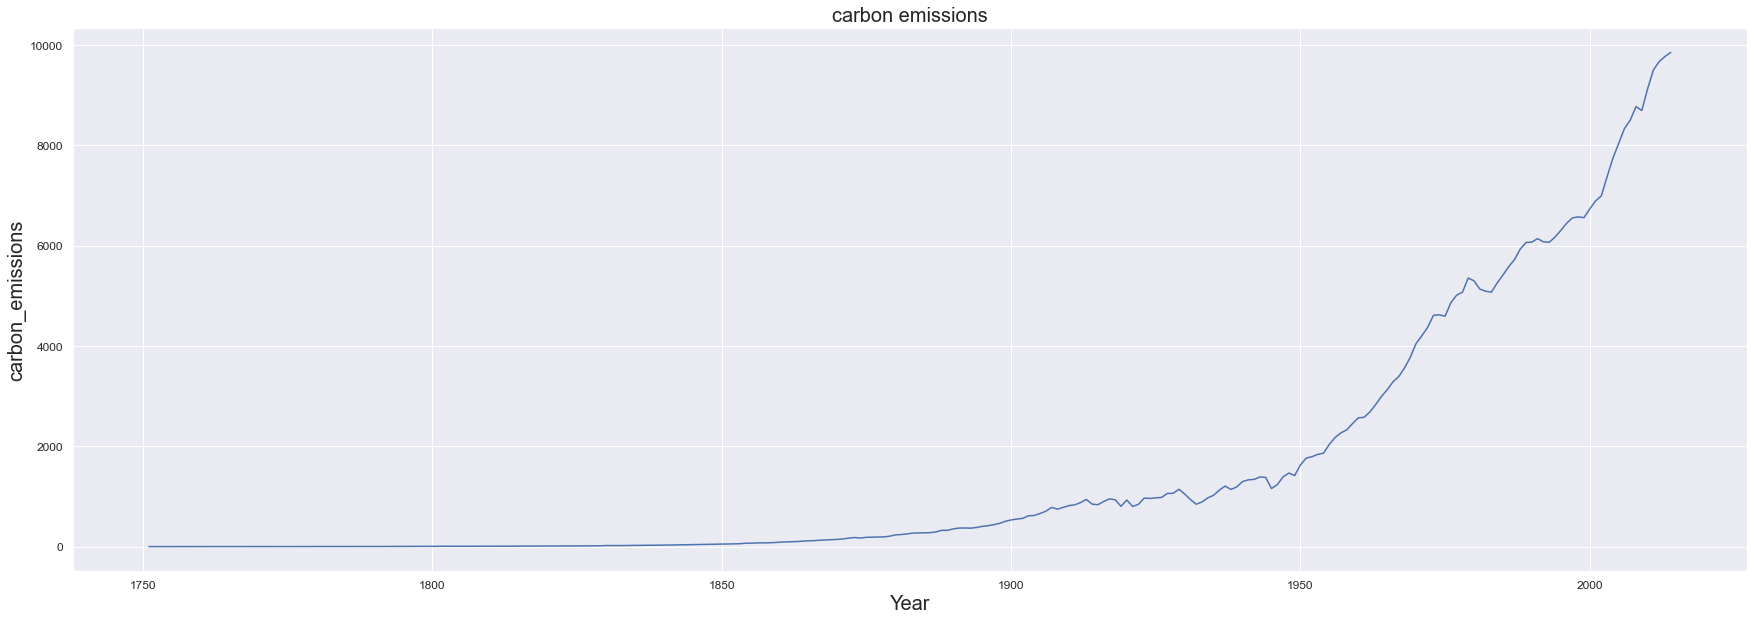

In [6]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df1.year,y=df1.carbon_emissions,data=df1, estimator=None)
plt.title("carbon emissions", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("carbon_emissions", fontsize=20)
plt.show()

Make a line plot of co2 concentration over time (year), coloring by the measurement source (source). Save this plot as co2_time for later use.

In [7]:
df2 = pd.read_csv("historicco2.csv")

In [8]:
df2.head()

,year,co2,source
0,1959,315.97,Mauna Loa
1,1960,316.91,Mauna Loa
2,1961,317.64,Mauna Loa
3,1962,318.45,Mauna Loa
4,1963,318.99,Mauna Loa


In [9]:
df2["source"].value_counts()

Ice Cores    634
Mauna Loa     60
Name: source, dtype: int64

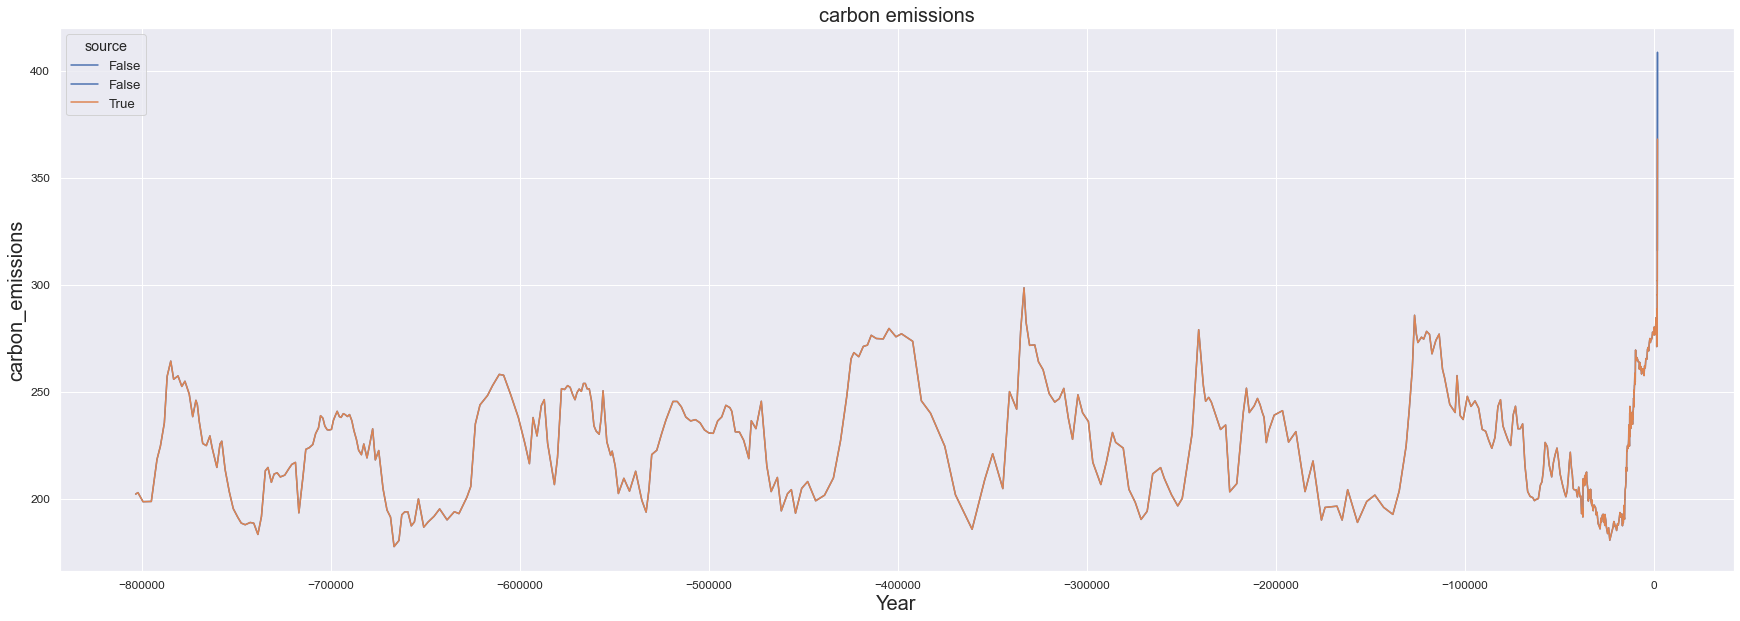

In [10]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df2.year,y=df2.co2,data=df2,hue=df2.source=="Muana Loa", estimator=None)
sns.lineplot(x=df2.year,y=df2.co2,data=df2,hue=df2.source=="Ice Cores", estimator=None)
plt.title("carbon emissions", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("carbon_emissions", fontsize=20)
plt.show()

Use the co2_time plot saved above. Change the limits as directed to investigate the rate of change in co2 over various periods with spikes in co2 concentration.

Change the x-axis limits to -3000 and 2018 to investigate modern changes in co2.

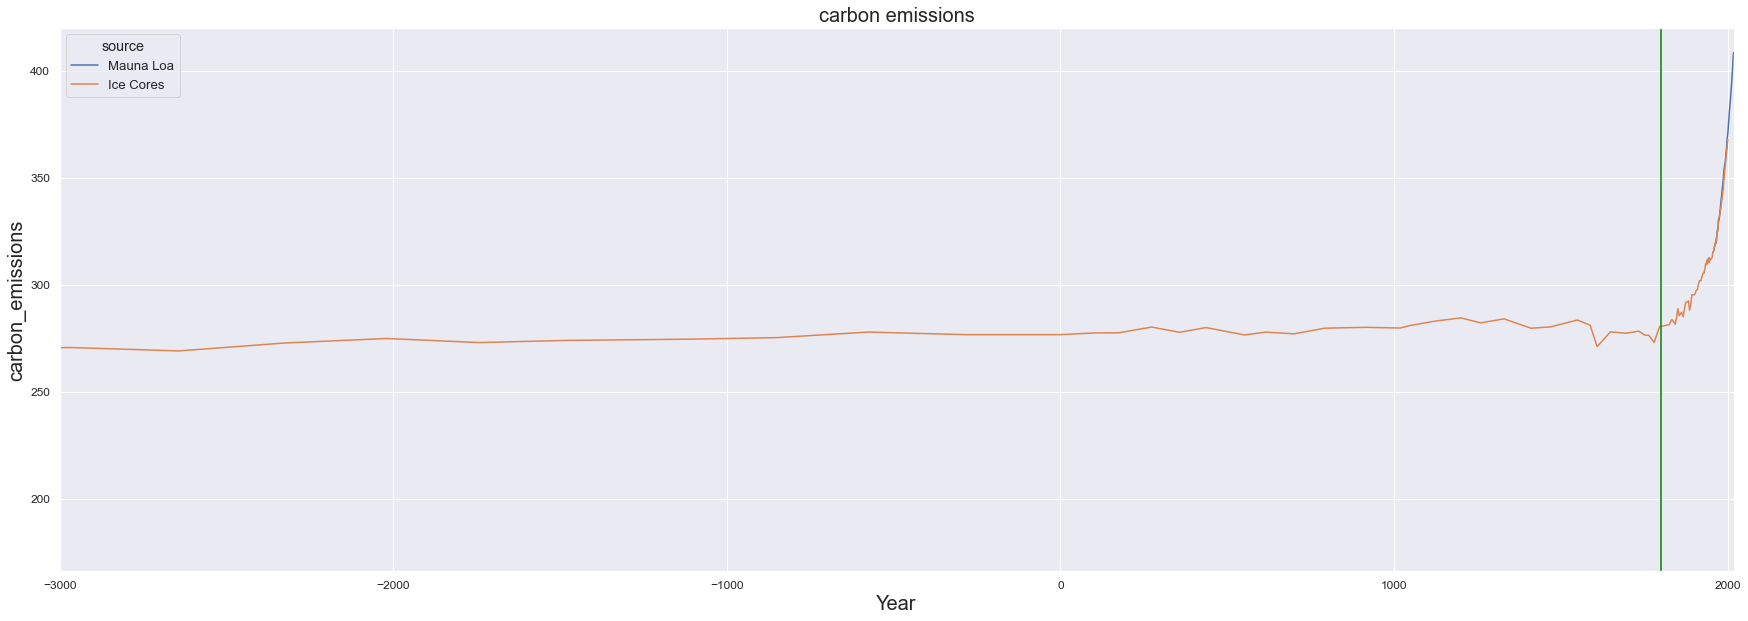

In [11]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df2.year,y=df2.co2,data=df2,hue=df2.source, estimator=None)
plt.title("carbon emissions", fontsize=20)
plt.xlim(-3000,2018)
plt.axvline(x=1800, color="green")
plt.xlabel("Year", fontsize=20)
plt.ylabel("carbon_emissions", fontsize=20)
plt.show()

About how many years did it take for co2 to rise from its stable level around 275 ppmv to the current level of over 400 ppmv?

In [12]:
df2["co2"].sort_values()

612   177.71
611   180.54
279   180.69
660   183.39
281   183.77
       ...  
55    398.65
56    400.83
57    404.24
58    406.55
59    408.52
Name: co2, Length: 694, dtype: float64

#### Python code done by Dennis Lam